[View in Colaboratory](https://colab.research.google.com/github/lnarasimhan83/anzdemo/blob/master/1st_DNN.ipynb)

# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras

In [3]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


(60000, 28, 28)


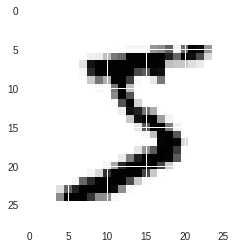

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 5,5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 4 ))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5), activation="relu")`
  import sys


In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 10)        2890      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 10)          2510      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 10)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 1, 1, 10)          1610      
_________________________________________________________________
flatten_10 (Flatten)         (None, 10)                0         
__________

In [40]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [41]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
47328/60000 [======================>.......] - ETA: 20s - loss: 0.2539 - acc: 0.9218

60000/60000 [==============================] - 95s 2ms/step - loss: 0.2217 - acc: 0.9318
Epoch 2/10
13600/60000 [=====>........................] - ETA: 1:14 - loss: 0.0807 - acc: 0.9753

60000/60000 [==============================] - 95s 2ms/step - loss: 0.0744 - acc: 0.9775
Epoch 3/10
  608/60000 [..............................] - ETA: 1:30 - loss: 0.0832 - acc: 0.9737

50208/60000 [========================>.....] - ETA: 15s - loss: 0.0567 - acc: 0.9834

60000/60000 [==============================] - 94s 2ms/step - loss: 0.0559 - acc: 0.9834
Epoch 4/10
16832/60000 [=======>......................] - ETA: 1:08 - loss: 0.0468 - acc: 0.9852

60000/60000 [==============================] - 95s 2ms/step - loss: 0.0464 - acc: 0.9854
Epoch 5/10
 1888/60000 [..............................] - ETA: 1:33 - loss: 0.0408 - acc: 0.9915

48864/60000 [=======================>......] - ETA: 17s - loss: 0.0397 - acc: 0.9881

60000/60000 [==============================] - 96s 2ms/step - loss: 0.0397 - acc: 0.9878
Epoch 6/10
16608/60000 [=======>......................] - ETA: 1:08 - loss: 0.0274 - acc: 0.9917

60000/60000 [==============================] - 95s 2ms/step - loss: 0.0347 - acc: 0.9892
Epoch 7/10
 1536/60000 [..............................] - ETA: 1:33 - loss: 0.0250 - acc: 0.9928

52896/60000 [=========================>....] - ETA: 11s - loss: 0.0315 - acc: 0.9900

60000/60000 [==============================] - 95s 2ms/step - loss: 0.0315 - acc: 0.9899
Epoch 8/10
17472/60000 [=======>......................] - ETA: 1:07 - loss: 0.0253 - acc: 0.9917

60000/60000 [==============================] - 96s 2ms/step - loss: 0.0283 - acc: 0.9911
Epoch 9/10
  576/60000 [..............................] - ETA: 1:35 - loss: 0.0241 - acc: 0.9878

52160/60000 [=========================>....] - ETA: 12s - loss: 0.0256 - acc: 0.9915

60000/60000 [==============================] - 96s 2ms/step - loss: 0.0262 - acc: 0.9914
Epoch 10/10
16672/60000 [=======>......................] - ETA: 1:09 - loss: 0.0202 - acc: 0.9934

60000/60000 [==============================] - 94s 2ms/step - loss: 0.0238 - acc: 0.9925


In [45]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [46]:
print(score)

[0.042921685538679595, 0.9868]


In [47]:
y_pred = model.predict(X_test)

In [48]:
print(y_pred[:9])
print(y_test[:9])

[[1.1425558e-13 4.8015175e-11 1.9116995e-09 6.0556640e-06 1.5120492e-15
  1.3660447e-13 1.4987734e-21 9.9998307e-01 9.1586842e-12 1.0891497e-05]
 [1.9284658e-07 2.1926480e-04 9.9977928e-01 1.3394398e-09 1.7674290e-10
  8.4100072e-14 1.1614333e-06 3.4347566e-12 6.4346745e-10 9.1965192e-11]
 [1.9977026e-08 9.9975449e-01 4.5437244e-07 1.3185768e-07 1.7356029e-04
  1.0923008e-07 6.0161858e-07 6.8371482e-05 2.2328340e-06 8.7305672e-08]
 [9.9999523e-01 2.1995816e-17 2.0670798e-10 2.1256519e-12 1.4713890e-11
  7.4865414e-14 4.7388321e-06 3.4510467e-14 2.2806168e-09 1.3067687e-09]
 [5.0548877e-13 3.3041191e-12 6.4771806e-11 1.0657759e-14 9.9999321e-01
  1.2190135e-13 7.3415595e-13 1.4241204e-12 2.2037254e-10 6.7741139e-06]
 [3.2619938e-09 9.9990141e-01 1.6196901e-07 2.0877247e-08 1.7602375e-05
  1.2705458e-09 9.0706473e-09 8.0307174e-05 4.5913524e-07 2.6870957e-08]
 [1.1942702e-15 6.4197103e-10 4.1658442e-08 5.7207721e-11 9.9980849e-01
  6.7695816e-10 9.1387644e-12 2.8617299e-07 1.0614756e-04 

In [49]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

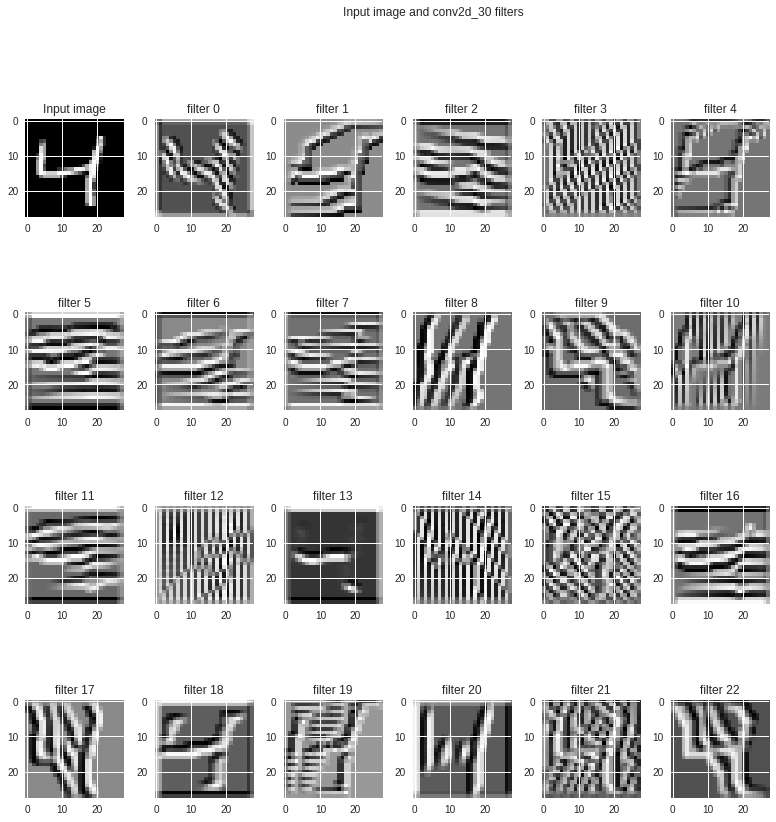

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_30'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()